In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./salary_and_other_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,"Senior Data Scientist , Advanced Analytics",$123K-$199K (Glassdoor est.),Senior Data Scientist\nRaytheon Missiles & Def...,3.8,Raytheon Missiles & Defense\n3.8,"Andover, MA",-1,-1,-1,-1,...,199,161.0,Raytheon Missiles & Defense\n,MA,-1,1,0,0,1,0
1,Data Scientist 2,$52K-$95K (Glassdoor est.),Description\nDigital Health and Analytics with...,3.9,Raytheon Missiles & Defense\n3.8,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,...,95,73.5,Raytheon Missiles & Defense\n,KY,59,1,0,1,0,0
2,Senior Data Engineer,$67K-$127K (Glassdoor est.),Join our team dedicated to developing and exec...,4.6,Novetta\n4.6,"Reston, VA",501 to 1000 Employees,2012,Company - Private,Enterprise Software & Network Solutions,...,127,97.0,Novetta\n,VA,8,1,0,1,1,1
3,Research Scientist/ Senior Research Scientist,$88K-$167K (Glassdoor est.),Research Scientist/ Senior Research Scientist\...,4.2,AstraZeneca\n4.2,"Gaithersburg, MD",10000+ Employees,1913,Company - Public,Biotech & Pharmaceuticals,...,167,127.5,AstraZeneca\n,MD,107,0,0,0,0,1
4,Spark/Big Data Engineer,$52K-$101K (Glassdoor est.),The Data Consumption team of Decision Sciences...,3.5,GEICO\n3.5,"Chevy Chase, MD",10000+ Employees,1936,Subsidiary or Business Segment,Insurance Carriers,...,101,76.5,GEICO\n,MD,84,0,0,1,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [23]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst' 
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'director' in title.lower():
        return 'director'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() \
        or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [18]:
# Job Title simplified
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist      141
analyst             101
na                   57
data engineer        36
machine learning      6
manager               5
director              4
Name: job_simp, dtype: int64

In [24]:
# Job seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        270
senior     78
junior      2
Name: seniority, dtype: int64

In [27]:
# Fixing Los Angeles- fixed
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() !='los angeles' else 'CA')
df['job_state'].value_counts()

CA    34
VA    31
MD    30
NY    28
MA    27
TX    20
FL    19
GA    17
UT    13
NJ    13
PA    12
WI    10
CO     8
MO     8
IL     8
IN     8
WA     7
NM     7
DC     6
NC     6
OH     4
MI     4
ME     3
AZ     3
NE     3
CT     3
KY     3
AR     3
TN     2
AL     2
IA     2
OK     2
MS     1
LA     1
ID     1
SC     1
Name: job_state, dtype: int64

In [29]:
# Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      4627
1      3525
2      5999
3      5182
4      3982
       ... 
345    1610
346    6253
347    2940
348    3890
349    4761
Name: desc_len, Length: 350, dtype: int64

In [34]:
# hourly wage into annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [35]:
df[['min_salary','max_salary']]

,min_salary,max_salary
0,123,199
1,52,95
2,67,127
3,88,167
4,52,101
...,...,...
345,52,93
346,94,155
347,33,63
348,97,156


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [37]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [38]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000
mean,3.748286,1868.380000,0.017143,0.005714,68.931429,117.568571,92.707143,41.854286,0.554286,0.0,0.177143,0.254286,0.582857,4274.865714
std,0.502355,450.367359,0.129989,0.075485,26.456233,39.560691,32.839770,42.028424,0.497756,0.0,0.382336,0.436082,0.493793,1882.214159
min,2.000000,-1.000000,0.000000,0.000000,17.000000,40.000000,17.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,839.000000
25%,3.400000,1947.000000,0.000000,0.000000,47.000000,87.250000,66.250000,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,3119.000000
50%,3.800000,1986.000000,0.000000,0.000000,65.500000,112.000000,89.000000,25.500000,1.000000,0.0,0.000000,0.000000,1.000000,4023.500000
75%,4.075000,2005.000000,0.000000,0.000000,88.000000,144.000000,116.000000,58.500000,1.000000,0.0,0.000000,1.000000,1.000000,5067.500000
max,4.900000,2020.000000,1.000000,1.000000,144.000000,235.000000,187.500000,190.000000,1.000000,0.0,1.000000,1.000000,1.000000,16050.000000


In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

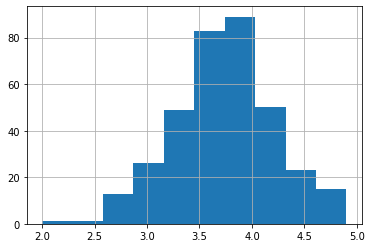

In [40]:
df.Rating.hist()

<AxesSubplot:>

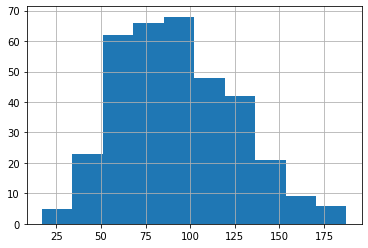

In [42]:
df.avg_salary.hist()

<AxesSubplot:>

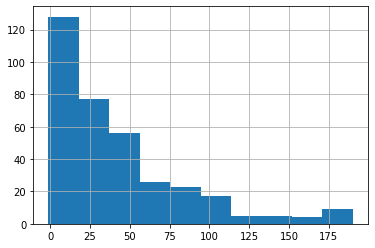

In [43]:
df.age.hist()

<AxesSubplot:>

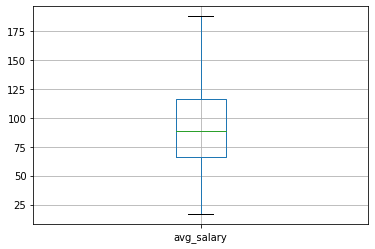

In [44]:
df.boxplot('avg_salary')

<AxesSubplot:>

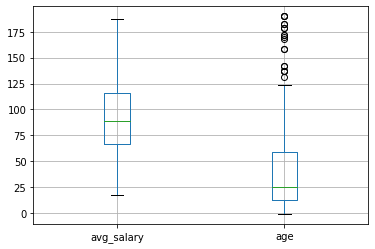

In [46]:
df.boxplot(['avg_salary', 'age'])

<AxesSubplot:>

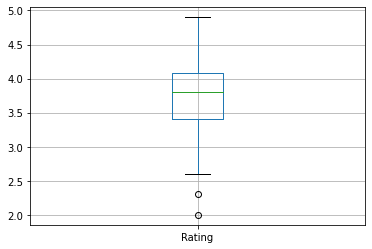

In [47]:
df.boxplot('Rating')

In [51]:
df_corr = df[['age', 'Rating', 'avg_salary', 'desc_len']]


In [52]:
df_corr.corr()

,age,Rating,avg_salary,desc_len
age,1.000000,0.046802,-0.057486,0.121866
Rating,0.046802,1.000000,0.118141,-0.009780
avg_salary,-0.057486,0.118141,1.000000,-0.046464
desc_len,0.121866,-0.009780,-0.046464,1.000000


<AxesSubplot:>

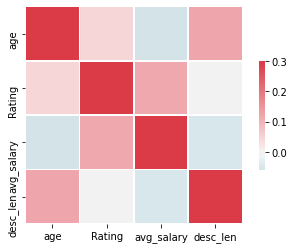

In [57]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr.corr(), vmax=.3, center=0, cmap=cmap,
           square=True ,linewidths=.5, cbar_kws={'shrink': .5})

In [59]:
# df.columns
df_catergorical = df[['Location', 'Size', 'Type of ownership',
            'Industry', 'Sector', 'Revenue','Company Name', 
            'company_txt','job_state', 'python_yn', 'R_yn', 
            'spark', 'aws', 'excel', 'job_simp', 'seniority', 
            'avg_salary']]

In [ ]:
for i in df_catergorical.columns:
    sns.barplot()